# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix


## Regression Model Evaluation

In [165]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [166]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [167]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [168]:
data.shape

(506, 14)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [170]:
linreg_model=LinearRegression(fit_intercept=True, n_jobs=-1)
linreg_model.fit(X_train, y_train)
y_pred_train=linreg_model.predict(X_train)
#print(y_pred_train)

In [171]:
linreg_model.fit(X_test, y_test)
y_pred_test=linreg_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [172]:

r2_score(y_train, y_pred_train),r2_score(y_test, y_pred_test)

(0.7401643500477915, 0.7709197360153498)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [173]:
mean_squared_error(y_train, y_pred_train),mean_squared_error(y_test, y_pred_test)

(22.28498108400217, 17.886308037782243)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [174]:
mean_absolute_error(y_train,y_pred_train),mean_absolute_error(y_test,y_pred_test)

(3.3262173739249303, 2.940266096850184)

## Classification Model Evaluation

In [175]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [177]:
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train,y_train)
y_pred_train=logreg.predict(X_train)

/home/laura/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [178]:
logreg.fit(X_test,y_test)
y_pred_test=logreg.predict(X_test)

/home/laura/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [179]:
accuracy_score(y_train,y_pred_train)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [180]:
balanced_accuracy_score(y_train,y_pred_train),balanced_accuracy_score(y_test,y_pred_test)

(0.931981981981982, 0.6666666666666666)

## 10. Calculate and print the precision score for both the training and the testing set.

In [149]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
#En el caso de macro,no tiene en cuenta el peso de cada una de las features.
precision_score(y_train, y_pred_train, average='micro'),precision_score(y_train, y_pred_train, average='macro')

(0.8666666666666667, 0.901169590643275)

In [150]:
precision_score(y_test, y_pred_test, average='micro'),precision_score(y_test, y_pred_test, average='macro')

/home/laura/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7666666666666667, 0.5694444444444445)

Parece que existe una mayor precisión en el caso de las macro,sin tener en cuenta el peso de cada una de las variables,esto lo probe para varios datos train al azar y siempre ocurre lo mismo,por lo que en principio para la precisión cogeriamos una media "macro"(se nota principalmente en el caso del train,ya que es mayor el conjunto de datos),en el caso del test,son muy similares,aun variando los datos.

## 11. Calculate and print the recall score for both the training and the testing set.

In [151]:
recall_score(y_train, y_pred_train, average='micro'),recall_score(y_train, y_pred_train, average='macro')

(0.8666666666666667, 0.8786116983791402)

In [152]:
recall_score(y_test, y_pred_test, average='micro'),recall_score(y_test, y_pred_test, average='macro')

(0.7666666666666667, 0.6190476190476191)

En este caso,practicamente no influye seleccionar macro/micro,puesto que estamos hablando de la sensibilidad.

## 12. Calculate and print the F1 score for both the training and the testing set.

In [153]:
f1_score(y_train, y_pred_train, average='micro'),recall_score(y_train, y_pred_train, average='macro')

(0.8666666666666667, 0.8786116983791402)

In [131]:
recall_score(y_test, y_pred_test, average='micro'),recall_score(y_test, y_pred_test, average='macro')

(0.9333333333333333, 0.9363636363636364)

## 13. Generate confusion matrices for both the training and the testing set.

In [157]:
cm = confusion_matrix(y_train,y_pred_train)
print(cm)

[[33  0  0]
 [ 0 29 15]
 [ 0  1 42]]


<AxesSubplot:>

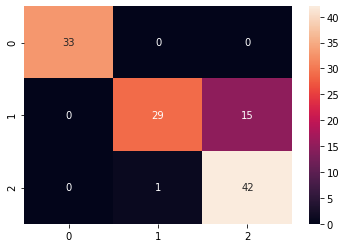

In [158]:
sns.heatmap(cm,annot=True)

En el caso del train,ha confundido 15 del tipo 2 con el tipo 1 y 1 al reves,se puede observar que donde se genera el conflicto es entre ambas,el tipo 0 esta completamente definido,no hay equivocación.El módelo esta bien entrenado,ya que casi todos los valores de la matriz de confusión son 0.

In [159]:
cm_2= confusion_matrix(y_test,y_pred_test)
print(cm)


[[33  0  0]
 [ 0 29 15]
 [ 0  1 42]]


<AxesSubplot:>

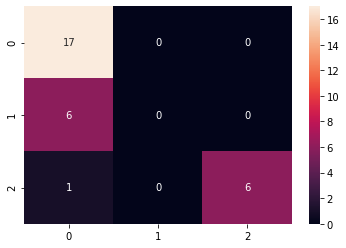

In [160]:
sns.heatmap(cm_2,annot=True)


En el caso del test,no ha habido ninguna flor de tipo 1,puesto que la diagonal es 0 en estos parámetros.Y en este caso se observa un mayor error en que confunde las flores de tipo 0 con flores de tipo 1??? no entiendo muy bien este heatmap...

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.